In [47]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA as sklearn_PCA
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [126]:
class PCA:
    
    def __init__(self):
        self.reduction_mat = None
    
    def fit(self, data, num_components):
        data = np.array(data)
        eig_vecs = -np.linalg.svd(np.cov(data, rowvar=False))[0]
        self.reduction_mat = eig_vecs[:, :num_components]
        
    def transform(self, x):
        transformed_x = [np.matmul(self.reduction_mat.T, _x) for _x in x]
        return np.array(transformed_x)


In [127]:
data = datasets.load_iris()
data, labels = data.data, data.target

#we will take only 3 features to visualize data
data = data[:, :3]

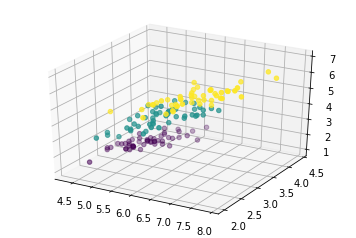

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)

In [129]:
pc = PCA()
e = pc.fit(data, 2)
transformed_data = pc.transform(data)

sklearn_pc = sklearn_PCA(2)
sklearn_pc.fit(data)
sklearn_transformed_data = sklearn_pc.transform(data)

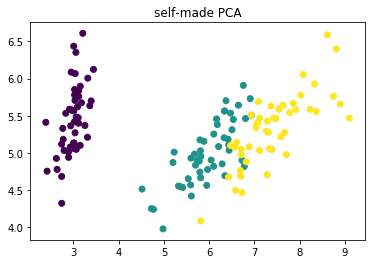

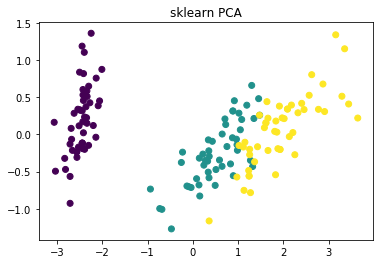

In [130]:
plt.figure(1)
plt.title('self-made PCA')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)

plt.figure(2)
plt.title('sklearn PCA')
plt.scatter(sklearn_transformed_data[:, 0], sklearn_transformed_data[:, 1], c=labels)